<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/Statistic/US_finance_analysis_A01703366.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Importando los datos


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
drive.mount("/content/gdrive")
!pwd
%cd "/content/gdrive/MyDrive/DataSetIA/US_dataset"
!ls

In [6]:
data = pd.read_csv('dataus2023.csv')
data.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.332411,104.0000,452000.000,NaN,2000
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,5057000.0,1622000.0,2679000.0,2186000.0,0.0,44.911205,73.7500,452271.967,1453000.0,2000
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,5344000.0,1762000.0,2925000.0,2510000.0,0.0,29.801249,48.9375,453014.579,1581000.0,2000
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,5655000.0,1853000.0,3160000.0,2758000.0,0.0,33.340861,54.7500,456366.381,1741000.0,2000
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,5461000.0,2129000.0,3667000.0,3070000.0,0.0,18.713509,30.7300,456769.737,1821000.0,2001


In [7]:
firms = pd.read_csv('firmsus2023.csv')
firms.head()

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.1,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC,Arlington Asset Investment Corp,activo,NaN,Servicios financieros y de seguros,Otros fondos,Fondos


In [8]:
data['adjprice'].describe()

count    2.415870e+05
mean     1.345754e+05
std      1.446327e+07
min      7.245836e-04
25%      9.710000e+00
50%      2.028000e+01
75%      4.052636e+01
max      3.505859e+09
Name: adjprice, dtype: float64

In [9]:
firms_selected=firms[["empresa","Nombre","status","naics1"]]
firms_selected.columns=['firm',"Empresa","status","industria"]
data =firms_selected.merge(data, on='firm', how='left')
data.head()

,firm,Empresa,status,industria,q,fiscalmonth,revenue,cogs,sgae,otherincome,...,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
0,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.332411,104.0000,452000.000,NaN,2000.0
1,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,...,5057000.0,1622000.0,2679000.0,2186000.0,0.0,44.911205,73.7500,452271.967,1453000.0,2000.0
2,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,...,5344000.0,1762000.0,2925000.0,2510000.0,0.0,29.801249,48.9375,453014.579,1581000.0,2000.0
3,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,...,5655000.0,1853000.0,3160000.0,2758000.0,0.0,33.340861,54.7500,456366.381,1741000.0,2000.0
4,A,"Agilent Technologies, Inc",activo,Industrias manufactureras,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,...,5461000.0,2129000.0,3667000.0,3070000.0,0.0,18.713509,30.7300,456769.737,1821000.0,2001.0


Hasta este punto tenemos un dataframe Data con los datos en bruto y las tablas unidas.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533089 entries, 0 to 533088
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   firm                533089 non-null  object 
 1   Empresa             533089 non-null  object 
 2   status              533089 non-null  object 
 3   industria           533089 non-null  object 
 4   q                   533088 non-null  object 
 5   fiscalmonth         240848 non-null  float64
 6   revenue             240837 non-null  float64
 7   cogs                240837 non-null  float64
 8   sgae                209734 non-null  float64
 9   otherincome         240837 non-null  float64
 10  extraordinaryitems  209734 non-null  float64
 11  finexp              240837 non-null  float64
 12  incometax           240837 non-null  float64
 13  totalassets         240842 non-null  float64
 14  currentassets       234044 non-null  float64
 15  inventory           198227 non-nul

## 0.1 Tranformando los tipos de datos

In [11]:
data['qdate']=pd.PeriodIndex(data.q, freq='Q')
data['qdate'].tail()

533084    2022Q3
533085    2022Q4
533086    2023Q1
533087    2023Q2
533088    2023Q3
Name: qdate, dtype: period[Q-DEC]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533089 entries, 0 to 533088
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype        
---  ------              --------------   -----        
 0   firm                533089 non-null  object       
 1   Empresa             533089 non-null  object       
 2   status              533089 non-null  object       
 3   industria           533089 non-null  object       
 4   q                   533088 non-null  object       
 5   fiscalmonth         240848 non-null  float64      
 6   revenue             240837 non-null  float64      
 7   cogs                240837 non-null  float64      
 8   sgae                209734 non-null  float64      
 9   otherincome         240837 non-null  float64      
 10  extraordinaryitems  209734 non-null  float64      
 11  finexp              240837 non-null  float64      
 12  incometax           240837 non-null  float64      
 13  totalassets         240842 non-null  float64

Con esto verificamos que tenemos todos los tipos de datos numéricos, los cuartos como qdate y las únicas variables de strin son la firma y q

## 0.2 Analizando el estado de nuestro dataset

In [13]:
print(data.shape)


(533089, 25)


Tenemos un dataset que cuenta con **533 089** registro y 36 columnas.
Dado que cada empresa aparece 4 veces al año tenemos alrededor de 133,000 registros de una empresa en un año.

Veamos cuantós valores nulos tenemos por columna.

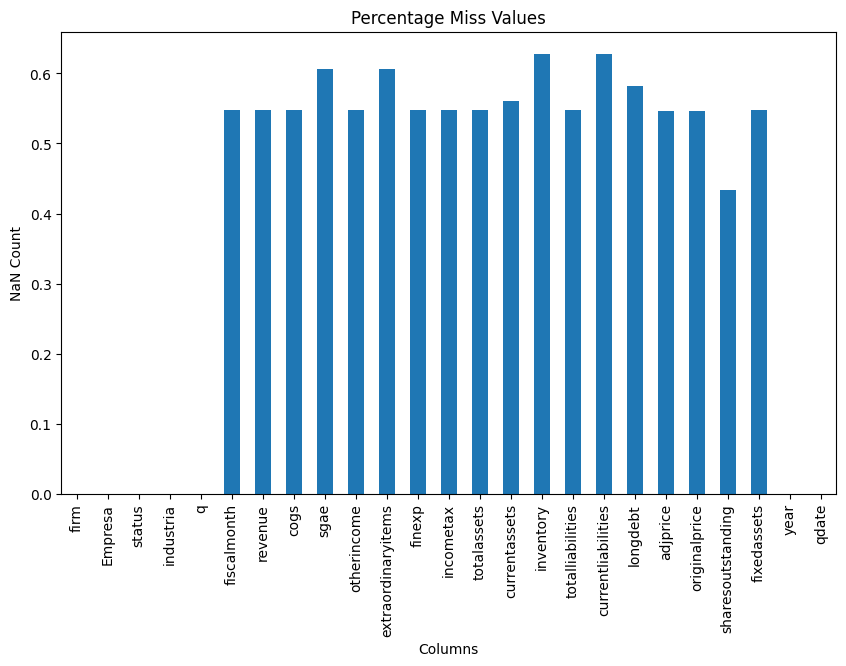

In [14]:
df = pd.DataFrame(data)

# Count the number of NaN values per column
total=df.shape[0]
nan_counts = df.isna().sum()/total
# Create a bar plot to visualize the NaN counts
nan_counts.plot(kind='bar', figsize=(10, 6), title='Percentage Miss Values')
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.xticks(rotation=90)
plt.show()

Tenemos que a excepción de los valores que identifican la empresa y el periodo tenemos alrededor de un 55% de valores faltantes por columna.

NOTA: Hay de acuerdo a cada análisis que vayamos a hacer hay que depurar que los NaN no afecten los datos que tenemos.


In [15]:
data.groupby('firm').mean().describe()

<ipython-input-15-33697a1aef23>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('firm').mean().describe()


,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
count,5572.000000,5.572000e+03,5.572000e+03,4.876000e+03,5.572000e+03,4.876000e+03,5.572000e+03,5.572000e+03,5.572000e+03,5.445000e+03,4.655000e+03,5.572000e+03,4.655000e+03,5.226000e+03,5.590000e+03,5590.000000,5.574000e+03,5.572000e+03,5614.000000
mean,7.429350,1.916513e+06,1.076802e+06,6.102362e+05,2.630056e+03,1.291578e+03,3.344741e+04,4.969429e+04,9.599065e+06,1.655175e+06,2.732221e+05,7.700401e+06,1.127220e+06,2.571926e+06,1.190732e+05,66.449082,1.378112e+05,1.223743e+06,2011.380652
std,0.255350,7.647644e+06,5.384824e+06,2.260552e+06,2.090681e+05,1.125156e+05,1.391464e+05,2.647171e+05,7.442791e+07,9.368402e+06,1.178346e+06,6.975762e+07,5.672247e+06,4.716452e+07,6.718943e+06,2526.882357,3.801120e+05,5.209355e+06,0.101647
min,3.000000,0.000000e+00,-6.462162e+01,-2.276071e+05,-1.413086e+07,-2.947548e+06,-5.935236e+05,-7.073103e+05,1.200579e+03,6.959184e+00,0.000000e+00,1.963887e+02,0.000000e+00,0.000000e+00,2.124467e-01,0.387365,6.123581e+02,0.000000e+00,2009.423077
25%,7.415094,4.529614e+04,4.995663e+02,4.208270e+04,-6.228948e+02,-2.299776e+02,0.000000e+00,0.000000e+00,2.574728e+05,8.256020e+04,0.000000e+00,9.628739e+04,2.900682e+04,1.186179e+04,1.164339e+01,9.901325,2.621151e+04,2.381665e+03,2011.378947
50%,7.469388,2.806855e+05,5.378153e+04,1.356718e+05,0.000000e+00,0.000000e+00,1.697561e+03,2.610066e+03,1.150625e+06,2.863907e+05,8.429868e+03,6.433048e+05,1.411956e+05,1.432009e+05,2.220414e+01,21.413783,5.200754e+04,5.148565e+04,2011.378947
75%,7.500000,1.126839e+06,4.909702e+05,4.063936e+05,9.695961e+02,1.700073e+02,2.160833e+04,2.394244e+04,3.919805e+06,8.695833e+05,1.432836e+05,2.605925e+06,5.449424e+05,8.441670e+05,4.008085e+01,39.806603,1.168334e+05,4.768583e+05,2011.378947
max,10.800000,2.538874e+08,1.912706e+08,5.230576e+07,3.338484e+06,3.912500e+06,6.293479e+06,9.838298e+06,2.750922e+09,3.280397e+08,3.938604e+07,2.734800e+09,2.086955e+08,2.656059e+09,4.931663e+08,188893.416069,8.971471e+06,1.786202e+08,2016.400000


**Pregunta** ¿Cömo es que cogs, sgae y other income, extraordnary, finexp. incomtaxes son negativos.

In [16]:
data.describe()

,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
count,240848.000000,2.408370e+05,2.408370e+05,2.097340e+05,2.408370e+05,2.097340e+05,2.408370e+05,2.408370e+05,2.408420e+05,2.340440e+05,1.982270e+05,2.408410e+05,1.982310e+05,2.226770e+05,2.415870e+05,241680.000000,3.015720e+05,2.408370e+05,533088.000000
mean,7.454594,3.048198e+06,1.696368e+06,9.274946e+05,2.654406e+03,3.892201e+03,4.805188e+04,8.584335e+04,1.531805e+07,2.590800e+06,4.475243e+05,1.233402e+07,1.710854e+06,4.071222e+06,1.345754e+05,114.654819,1.760945e+05,1.946829e+06,2011.379406
std,3.345922,1.286472e+07,8.963958e+06,3.919920e+06,6.036309e+05,3.456879e+05,2.599032e+05,6.008247e+05,1.096545e+08,1.698171e+07,1.858432e+06,1.020402e+08,8.017144e+06,6.661920e+07,1.446327e+07,4495.147361,5.668285e+05,7.899841e+06,6.856985
min,0.000000,-4.214926e+06,-7.360000e+05,-4.390000e+06,-4.266200e+07,-5.451200e+07,-3.785000e+06,-5.057100e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.245836e-04,0.001000,0.000000e+00,-1.007620e+05,2000.000000
25%,3.000000,7.126100e+04,4.610000e+02,4.144425e+04,-1.880000e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.647322e+05,8.989475e+04,0.000000e+00,1.432310e+05,4.171150e+04,4.479740e+03,9.710000e+00,10.000000,2.662809e+04,3.551000e+03,2005.000000
50%,6.000000,4.140200e+05,8.646500e+04,1.585225e+05,0.000000e+00,0.000000e+00,1.801000e+03,4.748000e+03,1.626928e+06,3.582620e+05,2.481996e+04,9.325920e+05,2.117560e+05,2.013670e+05,2.028000e+01,23.700000,5.983750e+04,1.090400e+05,2011.000000
75%,9.000000,1.712270e+06,7.171000e+05,5.414930e+05,5.300000e+02,0.000000e+00,2.809600e+04,4.044700e+04,5.935884e+06,1.276000e+06,2.594000e+05,3.899619e+06,8.590000e+05,1.221000e+06,4.052636e+01,45.297000,1.398500e+05,8.725850e+05,2017.000000
max,12.000000,6.112890e+08,4.637210e+08,2.364170e+08,1.274820e+08,1.590840e+07,2.620900e+07,3.880500e+07,4.323710e+09,1.056407e+09,8.696100e+07,4.254666e+09,3.448832e+08,4.242763e+09,3.505859e+09,537780.000000,9.821405e+07,2.555560e+08,2023.000000


## 0.3 Configuraciones adicionales


In [17]:
pd.options.display.float_format ='{:,.2f}'.format

# 1.0 Análisis financiero de las empresas de EU

## 1.1 Calculando variables financieras y ratios



In [18]:
data['ry']= np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))

In [19]:
data['rq']= np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

Calculamos los retornos anuales y por cuatrimestre.

In [20]:
data.columns

Index(['firm', 'Empresa', 'status', 'industria', 'q', 'fiscalmonth', 'revenue',
       'cogs', 'sgae', 'otherincome', 'extraordinaryitems', 'finexp',
       'incometax', 'totalassets', 'currentassets', 'inventory',
       'totalliabilities', 'currentliabilities', 'longdebt', 'adjprice',
       'originalprice', 'sharesoutstanding', 'fixedassets', 'year', 'qdate',
       'ry', 'rq'],
      dtype='object')

In [21]:
# ebit = revenue - cogs - sgae
data['ebit']=data['revenue'] - data['cogs'] - data['sgae']

#opm = ebit / revenue
# data['opm']=data['ebit']/ data['revenue'] -> Hay que hacer las validaciones de que el divisor sea distinton de 0
data['opm']= np.where(data['revenue']==0,np.NaN, data['ebit']/ data['revenue'])

# Calculate net income as: netincome = ebit + otherincome + extraordinaryitems - financial expenses - incometax
data['netincome'] = data['ebit']+ data['otherincome'] +data['extraordinaryitems'] - data['finexp'] -data['incometax']

#Calculate profit margin (ratio) as: pm = ni / revenue
data['pm'] = np.where(data['revenue']==0,np.NaN, data['netincome']/ data['revenue'])

#Calculate asset turn over ratio: ato = revenue / totalassets
data['ato'] = np.where(data['totalassets']==0,np.NaN, data['revenue']/ data['totalassets'])

#Calculate acid ratio: acidratio = currentassets / currentliabilities
data['acidratio']= np.where(data['currentliabilities']==0,np.NaN, data['currentassets']/ data['currentliabilities'])

#Calculate financial leverage ratio as: finlev=longdebt / totalassets
data['finlev'] = np.where(data['totalassets']==0,np.NaN, data['longdebt']/ data['totalassets'])

#Calculate market value as: mvalue = originalprice * sharesoutstanding
data['mvalue']=data['originalprice']*data['sharesoutstanding']

#Calculate book value as: bookvalue = totalassets - totalliabilities
data['bookvalue'] = data['totalassets'] - data['totalliabilities']


In [22]:
#Sí podemos tener book value negativo. Vease el caso de General Motors Company que sufrió una crisis en 2008 En ese tiempo tampoco tenemos mvalue :(
columns=['firm','q','Empresa','totalassets','totalliabilities','bookvalue','mvalue']
['firm','q','Empresa','bookvalue','mvalue']
sorted_df = df[columns].sort_values(by='bookvalue', ascending=True)
print(df[columns][(df['firm']=='GM') & (df['q']>='2007q3')])


       firm       q                 Empresa    totalassets  totalliabilities  \
203845   GM  2007q3  General Motors Company 149,500,000.00    189,571,000.00   
203846   GM  2007q4  General Motors Company 148,883,000.00    184,363,000.00   
203847   GM  2008q1  General Motors Company 145,741,000.00    185,415,000.00   
203848   GM  2008q2  General Motors Company 136,046,000.00    191,640,000.00   
203849   GM  2008q3  General Motors Company 110,425,000.00    169,419,000.00   
...     ...     ...                     ...            ...               ...   
203905   GM  2022q3  General Motors Company 260,529,000.00    190,989,000.00   
203906   GM  2022q4  General Motors Company 264,037,000.00    192,109,000.00   
203907   GM  2023q1  General Motors Company 267,004,000.00    193,044,000.00   
203908   GM  2023q2  General Motors Company 275,833,000.00    200,146,000.00   
203909   GM  2023q3  General Motors Company            NaN               NaN   

            bookvalue        mvalue  
2

## 1.2 Composición de las firmas del mercado financiero de US
1. ¿Cuántas firmas activas tenemos?

2. ¿Qué podemos decir de la firma promedio en terminos de book and market value?
¿Cómo cambian estas variables de acuerdo a cada industria?
¿Como se distribuye el tamaño de las firmas en el valor de mercado?

3. ¿Cuáles son las 10 firmas más grandes en terminos de valor de mercado y que tan alejadas están de la firma tipica de US?

4. Repite el análisis con el valor de libro


### 1.2.1 ¿Cuántas firmas activas hay?


In [23]:
firms[(firms['status']=="activo")].status.count()


3553

**Según el Dataset tenemos que hasta el tercer cuatrimestre de 2023 se tienen registradas 3553 firmas activas**

### 1.2.2
* ¿Qué podemos decir de la firma promedio en terminos de book and market value?
* ¿Cómo cambian estas variables de acuerdo a cada industria?
* ¿Como se distribuye el tamaño de las firmas en el valor de mercado?

Vamos a obtener solo las columnas que nos importan. Firmas, fechas, market value, book value e industria.

In [24]:
df=data.copy()
df['qy']=df['q'].str[:4]
df['qn']=df['q'].str[5]
df_value=df[['firm','qy','qn','bookvalue','mvalue','Empresa']]
df_value.describe()

,bookvalue,mvalue
count,"240,841.00","234,105.00"
mean,"2,984,094.28","8,656,292.04"
std,"12,464,461.01","42,855,754.64"
min,"-90,520,000.00",0.00
25%,"114,977.00","323,095.95"
50%,"540,758.00","1,457,001.12"
75%,"1,764,300.00","4,610,819.53"
max,"539,883,000.00","3,050,896,326.94"


Viendo la estádistica descriptiva tenemos que
(Entiendase que las unidades están en miles)
- Book value

Tenemos una media de 8 millones con una desviación estándar de 42 millones y una mediana de 1 millon.
- Market Value

Tenemos una media de 3 millones, desviación estándar de 12 millones u mediana de 0.5 millones.

*Con estos datos no podemos concluir nada ya que tienen una dispersión extrema. Vamos a graficar a escala logaritmica y entender un poco mejor estos datos*


Ahora bien. Aunque sabemos que una empresa que lleva activa desde el 2000 hasta el 2023 no se parece en nada en esos 23 años vamos a ver cómo se comporta el *market value* y *book value* de las empresas a lo largo de estos 23 años. La información que se toma para 1 empresa es el promedio de book value y market value de esa empresa en un año.

<ipython-input-25-2d7c9d358cda>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df_value.groupby(['qy','firm']).mean().reset_index()


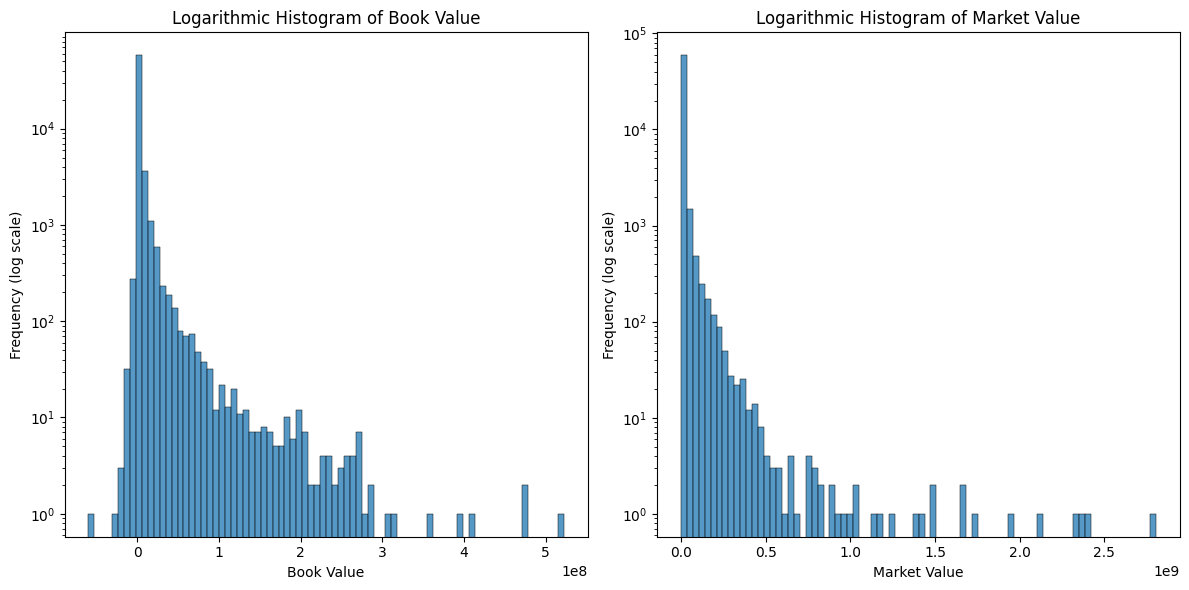

In [25]:
df=df_value.groupby(['qy','firm']).mean().reset_index()
df=df[['bookvalue','mvalue']]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='bookvalue', bins=80, log_scale=(False, True))
plt.xlabel('Book Value')
plt.ylabel('Frequency (log scale)')
plt.title('Logarithmic Histogram of Book Value')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='mvalue', bins=80, log_scale=(False, True))
plt.xlabel('Market Value')
plt.ylabel('Frequency (log scale)')
plt.title('Logarithmic Histogram of Market Value')

plt.tight_layout()
plt.show()

** Con esta escala logaritmica se puede apreciar claramente cómo la empresa típica de los EU en los últimos 23 años tiene un book value entre 0 y 1,000,000K. Mientras tiene un valor de mercado entre 0 y 7,000,000K  **

No obstante podemos observar como hay empresas que están a la derecha de la gráfica esto significa que son mucho más grandes que las otras.

Otra observación que podemos hacer es que la mayor cantidad están pegadas al 0 viendo esto significa que el book value la moda del book value de las empresas está por debajo de las 7 cifras. Lo mismo para el Market value.

Ahora vamos a analizar cómo es que se comportan las 10 empresas con mayor market value y book value

In [26]:
df=df_value.copy()
df=df.groupby(['Empresa']).mean().reset_index()
df=df.sort_values(by='mvalue', ascending=False)
df=df[['Empresa','mvalue']]
print(df.head(10))


                       Empresa         mvalue
400                  Apple Inc 641,355,806.73
3282            Microsoft Corp 619,952,933.01
253               Alphabet Inc 538,889,700.75
3257       Meta Platforms, Inc 426,880,230.11
269            Amazon.Com, Inc 365,330,986.11
1882          Exxon Mobil Corp 341,744,666.55
694     Berkshire Hathaway Inc 297,235,297.21
5393               Walmart Inc 252,627,666.53
2776         Johnson & Johnson 252,210,862.32
2158  General Electric Company 243,687,891.56


<ipython-input-26-128cfe93f6fd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.groupby(['Empresa']).mean().reset_index()


In [27]:
df.describe()

,mvalue
count,"5,539.00"
mean,"5,525,938.54"
std,"22,802,781.56"
min,"5,340.95"
25%,"266,480.96"
50%,"1,184,225.70"
75%,"3,315,879.21"
max,"641,355,806.73"


Si tomamos como empresa tipica el cuartil 50 o mediana tenemos
que ** el top 10 empresas con mayor marke value es entre 221.4 y 582.7 veces la empresa típica **

In [28]:
df=df_value.copy()
df=df.groupby(['Empresa']).mean().reset_index()
df=df.sort_values(by='bookvalue', ascending=False)
df=df[['Empresa','bookvalue']]
print(df.head(10))

                       Empresa      bookvalue
694     Berkshire Hathaway Inc 212,939,531.91
628       Bank Of America Corp 191,536,691.49
2785       Jpmorgan Chase & Co 176,052,819.15
1152             Citigroup Inc 159,196,872.34
1882          Exxon Mobil Corp 144,054,085.11
5430     Wells Fargo & Company 121,283,085.11
253               Alphabet Inc 104,546,862.50
1110              Chevron Corp 104,031,840.43
34                    AT&T Inc 102,536,202.13
2158  General Electric Company  90,204,617.02


<ipython-input-28-a742981c3c42>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.groupby(['Empresa']).mean().reset_index()


In [29]:
df.describe()

,bookvalue
count,"5,559.00"
mean,"1,893,572.93"
std,"7,816,468.80"
min,"-7,032,500.00"
25%,"93,703.62"
50%,"374,666.35"
75%,"1,219,416.44"
max,"212,939,531.91"


Haciendo un análisis analogo con el book value tenemos que:

 ** El top 10 empresas con mayor book value es entre 275 y 575 veces la empresa típica **

*Para esto calulamos bookv_top_10/median y bookv_top_1/median*

### 1.2.3 Comportamiento de book value y market value por año


In [30]:
df=df_value.copy()
df = df.groupby(['qy']).mean().reset_index()
df_relative=df.copy()
df_relative['mvalue']=df_relative['mvalue']/df_relative['mvalue'][0]
df_relative['bookvalue']=df_relative['bookvalue']/df_relative['bookvalue'][0]

<ipython-input-30-a0f084f98826>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['qy']).mean().reset_index()


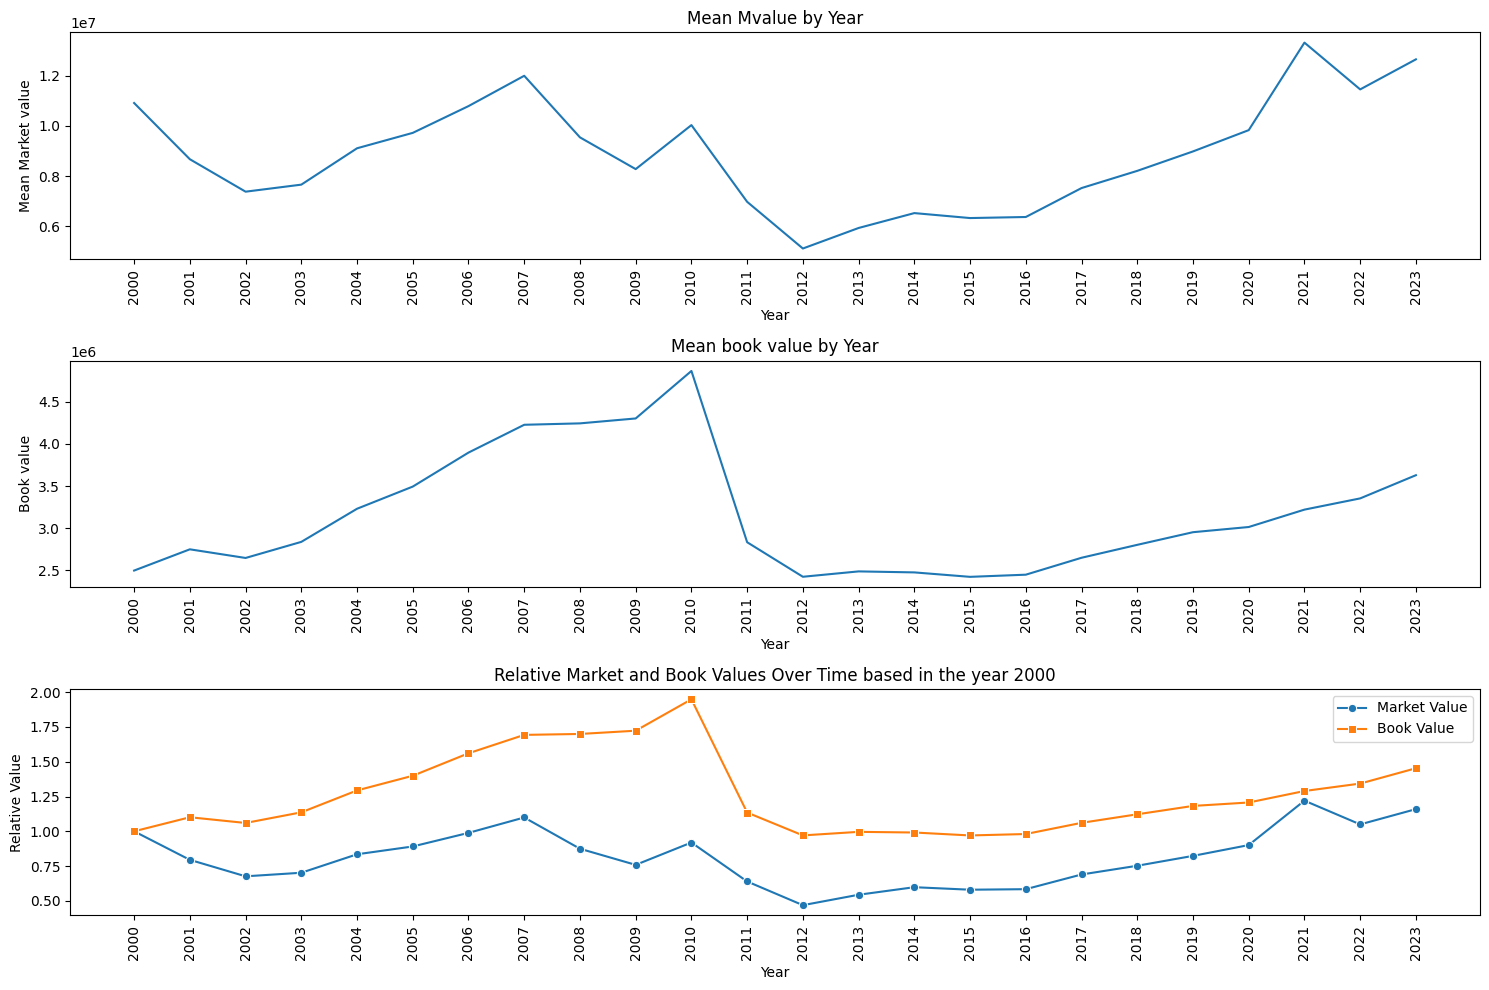

In [31]:
# Create subplots with 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# PMean Mvalue by Year
sns.lineplot(x='qy', y='mvalue', data=df, ax=axes[0])
axes[0].set_title('Mean Mvalue by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean Market value')
axes[0].tick_params(axis='x', rotation=90)

# Mean book value by Year
sns.lineplot(x='qy', y='bookvalue', data=df, ax=axes[1])
axes[1].set_title('Mean book value by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Book value')
axes[1].tick_params(axis='x', rotation=90)

#Relative Market and Book Values Over Time based in the year 2000
sns.lineplot(x='qy', y='mvalue', data=df_relative, label='Market Value', marker='o', ax=axes[2])
sns.lineplot(x='qy', y='bookvalue', data=df_relative, label='Book Value', marker='s', ax=axes[2])
axes[2].set_title('Relative Market and Book Values Over Time based in the year 2000')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Relative Value')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()


En esta última gráfica podemos observar que con base en el año 2000,
*  El book value ha tenido un mayor creciimiento que el book value.
*  Hacía 2023 el book value es casi 50 % más grande que lo que era en el año 2000 y con tendencia de seguir creciendo.
*  Hacía el 2023 el market value es apenas más grande que lo que era en el 2000 y con tendencia de seguir creciendo.


Por otra parte vamos a obtener un panorama general de cómo las distintas industrias han crecido en su valor de mercado

In [32]:
df=data.copy()
df['qy']=df['q'].str[:4]
df['qn']=df['q'].str[5]
df=df[['qy','qn','mvalue','bookvalue','industria']]
#df.industria.unique()

<ipython-input-33-80a61b6523f2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(['qy', 'industria']).mean().reset_index()


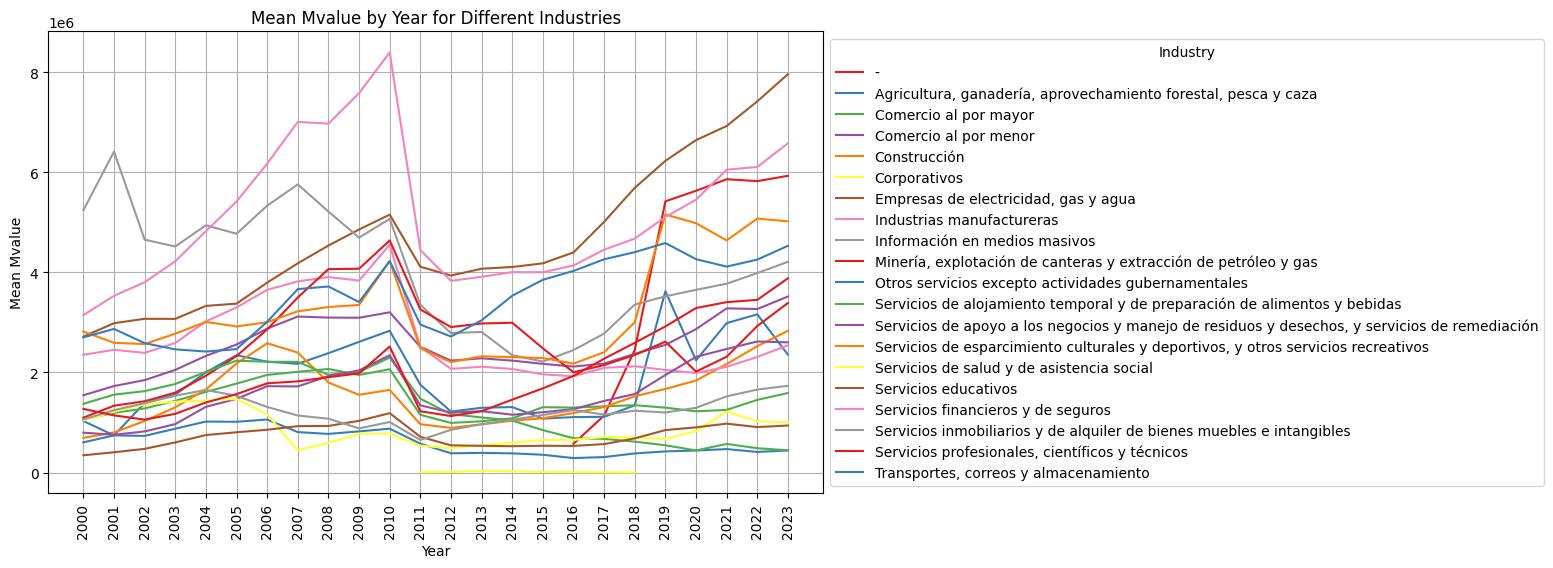

In [33]:
# Set a color palette for industries
df_grouped = df.groupby(['qy', 'industria']).mean().reset_index()
palette = sns.color_palette("Set1", n_colors=len(df_grouped['industria'].unique()))
# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='qy', y='bookvalue', hue='industria', data=df_grouped, palette=palette)
plt.title('Mean Mvalue by Year for Different Industries')
plt.xlabel('Year')
plt.ylabel('Mean Mvalue')
plt.legend(title='Industry',loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


## 1.3 Evolución del mercado financiero US

 Consideranto la historia financiera de todas las firmas y solo la información anual fiscal.  
(selecting fiscalmonth=12) para ambas preguntas.

1- ¿Cómo ha cambiado el valor de mercado con los años? Has una gráfica

2- ¿Cómo la ganancias (revenue) e ingreso total (net income) de todas las firmas han cambiado a lo largo de los años? Has una gráfica



Vamos a filtrar los datos por únicamente aquellos que correspondan al mes fiscal 12

In [34]:
df=data.copy()
df['qy']=df['q'].str[:4]
df=df[df['fiscalmonth']==12]
columns=['Empresa','firm','qy','mvalue','revenue','netincome']
df_year=df[columns]
df=df_year.copy()
df=df.groupby('qy').mean()

#Relaitve values 2000 revenue/netincome
df_relative=df
df_relative['netincome']=df_relative['netincome']/df_relative['netincome'][0]
df_relative['revenue']=df_relative['revenue']/df_relative['revenue'][0]


<ipython-input-34-94a221df1b22>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.groupby('qy').mean()


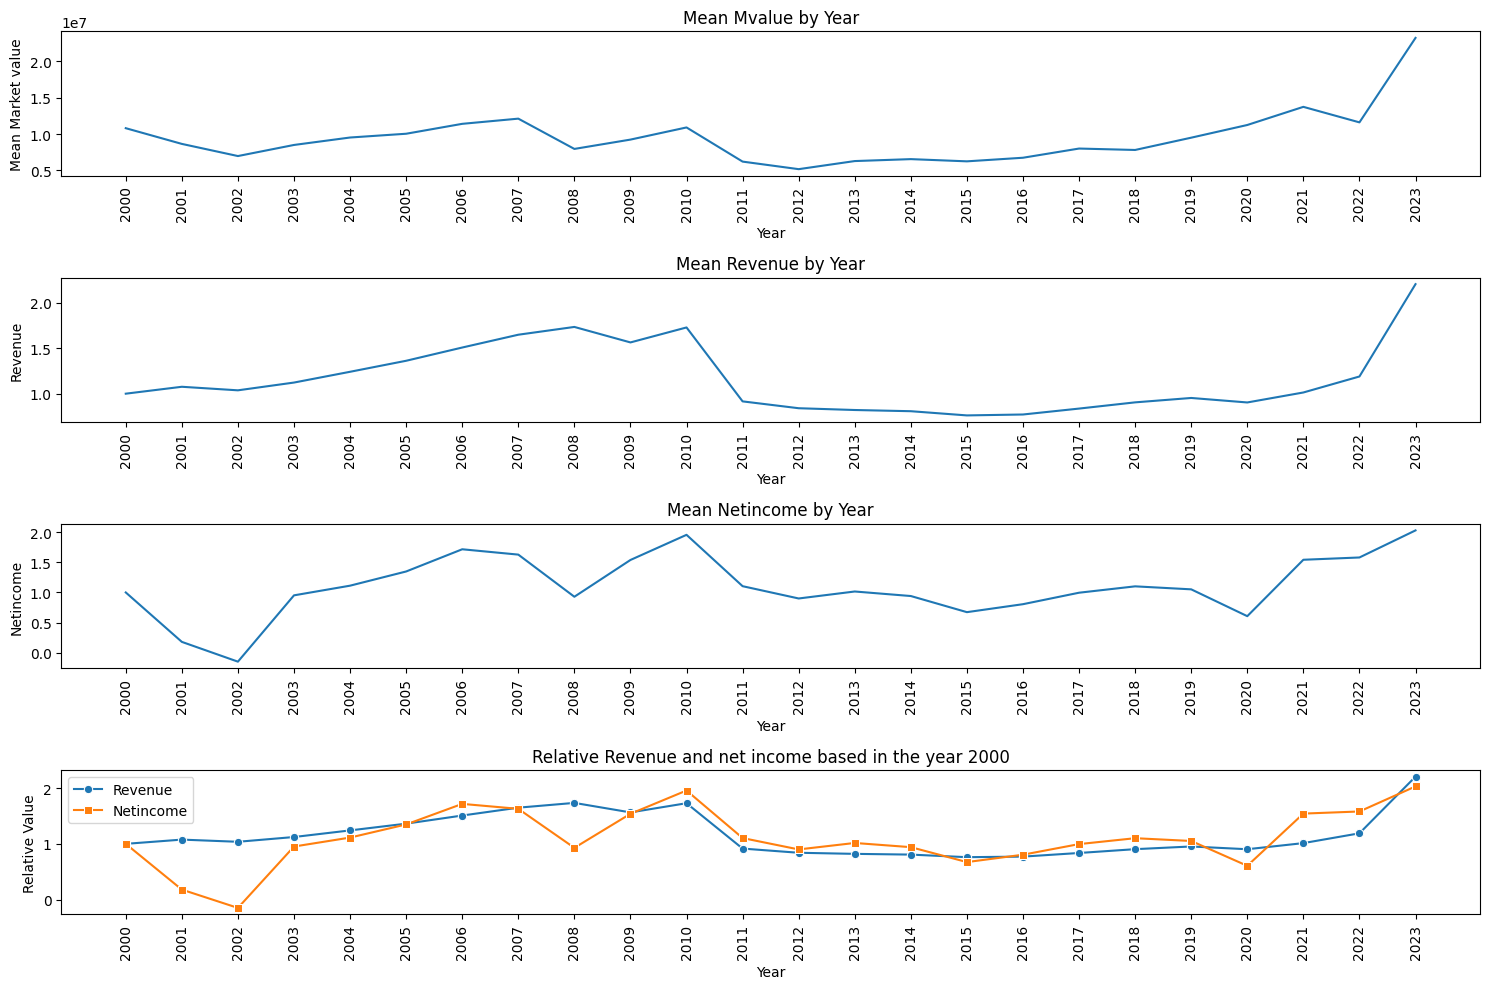

In [35]:
# Create subplots with 3 rows and 1 column
fig, axes = plt.subplots(4, 1, figsize=(15, 10))

# PMean Mvalue by Year
sns.lineplot(x='qy', y='mvalue', data=df, ax=axes[0])
axes[0].set_title('Mean Mvalue by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean Market value')
axes[0].tick_params(axis='x', rotation=90)

# Mean revenue by Year
sns.lineplot(x='qy', y='revenue', data=df, ax=axes[1])
axes[1].set_title('Mean Revenue by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Revenue')
axes[1].tick_params(axis='x', rotation=90)

# Mean netincom by Year
sns.lineplot(x='qy', y='netincome', data=df, ax=axes[2])
axes[2].set_title('Mean Netincome by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Netincome')
axes[2].tick_params(axis='x', rotation=90)

#Relative Revenue and net income based in the year 2000
sns.lineplot(x='qy', y='revenue', data=df_relative, label='Revenue', marker='o', ax=axes[3])
sns.lineplot(x='qy', y='netincome', data=df_relative, label='Netincome', marker='s', ax=axes[3])
axes[3].set_title('Relative Revenue and net income based in the year 2000')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Relative Value')
axes[3].legend()
axes[3].tick_params(axis='x', rotation=90)


# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure



**Si consideramos unicamente los datos de cierre de año fiscal de las firmas de estados unidos podemos decir que:**

1.   El valor de mercado de las firmas de EU tuvo un fuerte declive en 2011. A partir de ahí el valor se ha ido recuperando y apunta a la alza.
2.   De la misma manera el revenue y net income de las empresas ha tendido a la alza con sus respectivos declives en 2010.
3.   Si comparamos los útlimos 23 años de revenue y netincome con el año 2000 tenemos que hacua 2010 las empresas habían obtenido un aumento del 50% de gananacias y de ingreso neto respecto al año 2000. Tan solo en 2011 perdieron todo este margen. A partir de ahísse ha mantuvo en continuo incremento y a este último periodo se tiene registro que las ganancias reportadas en 2023 ronda alrededor del doble de las ganancias que se tenian en el año 2000.


```
# Tiene formato de código
```





## 1.4 Más sobre la industira de manofactura




## 1.4.1 Estadistica descriptiva de la indusrtia de manofactura


Generando el dataset que utilizaremos para analizar la industria manofacturera. Filtraremos las inustrias manofactureras con fin del año fiscal y con fecha antes del 2023

In [36]:
df=data.copy()
df=df[(df['q']<'2023q1') &(df['fiscalmonth']==12) & (df['industria']=="Industrias manufactureras")]
df_ind=df.copy()
df.columns

Index(['firm', 'Empresa', 'status', 'industria', 'q', 'fiscalmonth', 'revenue',
       'cogs', 'sgae', 'otherincome', 'extraordinaryitems', 'finexp',
       'incometax', 'totalassets', 'currentassets', 'inventory',
       'totalliabilities', 'currentliabilities', 'longdebt', 'adjprice',
       'originalprice', 'sharesoutstanding', 'fixedassets', 'year', 'qdate',
       'ry', 'rq', 'ebit', 'opm', 'netincome', 'pm', 'ato', 'acidratio',
       'finlev', 'mvalue', 'bookvalue'],
      dtype='object')

In [37]:
firms[(firms['naics1']=="Industrias manufactureras") & (firms['status']=="activo") ].status.count()

1540

Cuantas firmas activas tenemos en la industria. En este caso tenemos 1540 firmas activas en la industria manofacturera.

#### Muestra estadistica descriptiva de
*   Retorno logaritmico trimestral
*   Retorno logaritmico anual
*   Total assets
*   Revenue

Y un ratio
*   Profit margin
*   Asset turn over ratio
*   Netincome


In [38]:
column=['rq','ry','totalassets','revenue','ato']
descriptive=df[column].describe().T
descriptive=descriptive.T
print(descriptive)

             rq        ry    totalassets        revenue        ato
count 21,573.00 19,839.00      22,712.00      22,712.00  22,711.00
mean      -0.01     -0.04   6,654,737.85   4,947,941.32      27.43
std        0.32      0.62  29,115,709.33  18,920,893.84   4,006.91
min       -3.64    -10.69           0.00     -93,237.00      -0.15
25%       -0.14     -0.28     135,111.50      43,248.47       0.37
50%        0.03      0.05     766,797.50     600,494.50       0.73
75%        0.15      0.29   3,181,315.00   2,773,728.25       1.10
max        3.65      3.60 797,769,000.00 467,029,000.00 603,848.69


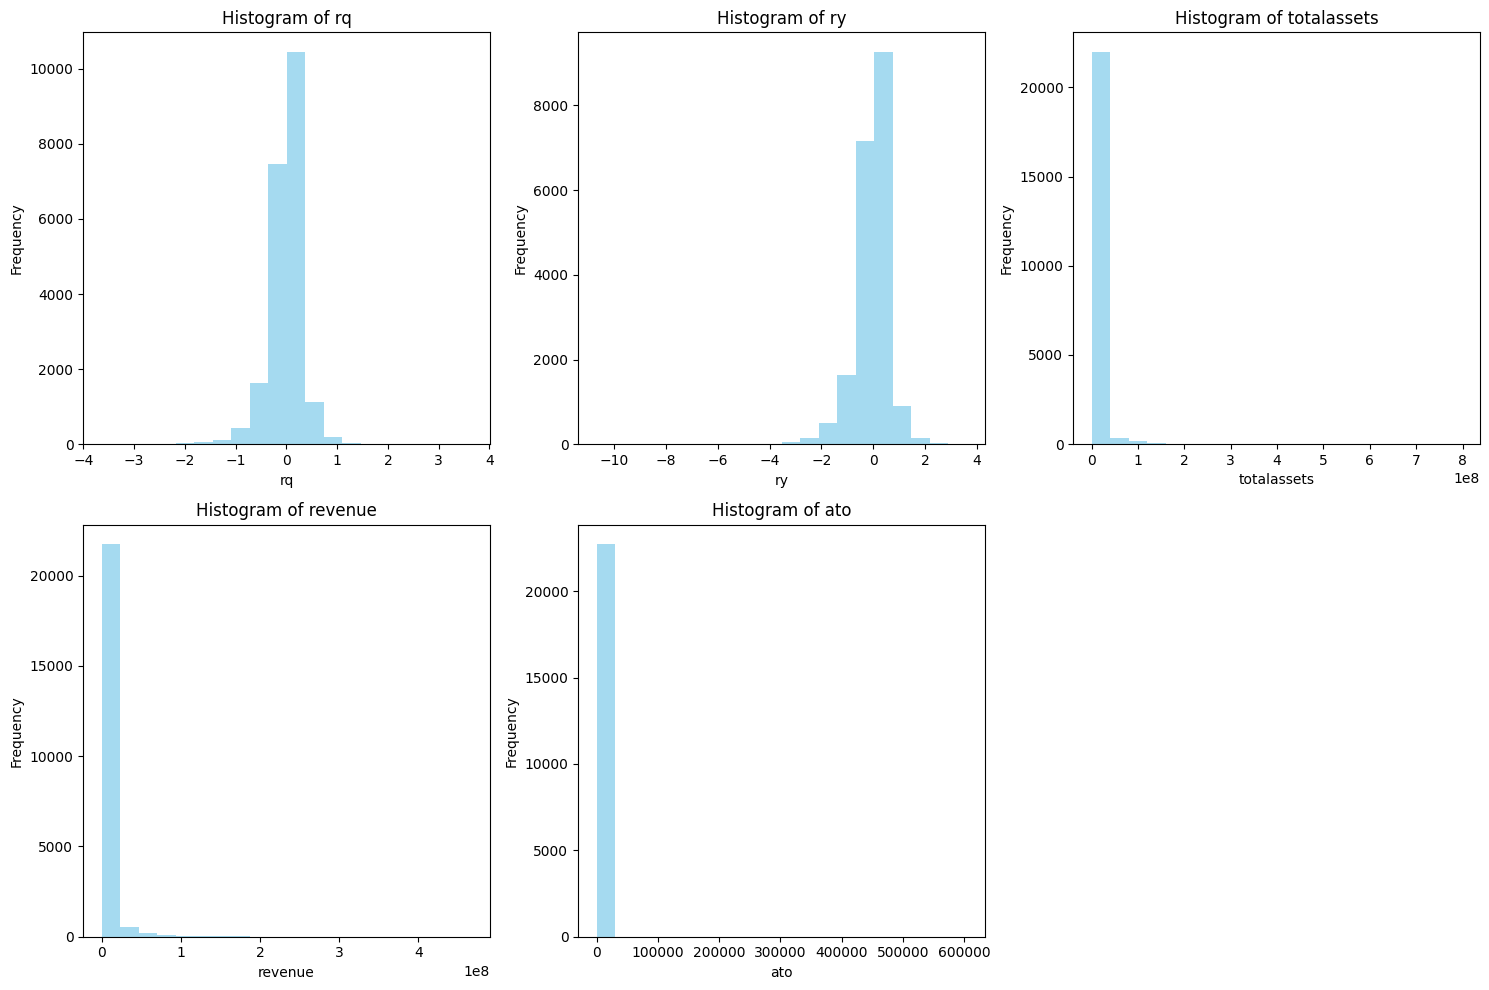

In [39]:
# Create histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(column):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[column], bins=20, color='skyblue', alpha=0.75)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


En principio tenemos dos comportamientos. Unas variables siguen distribución normal o algo parecido y otra se comportan de manera logaritmica.
Los retornos tanto trimestrales como anuales parece que se agrupan de manera normal alrededor del 0. Lo que quiere decir que es más o menos la misma probabilidad que suba o baje el retorno. Además notamos que hay algunos valores extremos. Lo que significa que tienen mucho mayor riesgo de lo que una distribución normal puede predecir.

Por otra parte aquellas variables con comportamiento logaritmico hacen mucho sentido. Ya que se trata de ingresos totales y ganancias. Como ya pudimos ver en la empresa típica de los EU tenemos que hay muchas empresas que ganan poco y pocas que ganan mucho.

Finalmente el ATO que es un ratio que se calcula dividiendo las ganacias entre los activos. Esto mide la capacidad de aumentar la empresa con base en los recursos que tiene la empresa. Y aqui podemos ver que dentro de la industria manofacturera el  de 27 pero la mediana dice 0.3. Viendo la desviación estánar que claramente rompe las magnitudes con las que tratamos vamos a tomar la mediana como ejemplo típico. Y podemos decir que la empresa manofactgurera típica de los EU gana 0.3 veces el cúantos activos tiene.

Estadistica descriptiva:
Analizando las desviaciones estándares vamos a calular el intervalo de confianza de 95% de cada una de las variables de análasis.


In [40]:
'''descriptive['low_95']=descriptive['mean']-2*descriptive['std']
descriptive['high_95']=descriptive['mean']+2*descriptive['std']
descriptive['t']=descriptive['mean']/descriptive['std']
descriptive'''

"descriptive['low_95']=descriptive['mean']-2*descriptive['std']\ndescriptive['high_95']=descriptive['mean']+2*descriptive['std']\ndescriptive['t']=descriptive['mean']/descriptive['std']\ndescriptive"

Una vez hemos calculado el intervalo de 95% de confianza y T value podemos hacer algunas observaciones. Ninguna de estas variables

In [41]:
df=df_ind.copy()
columns=['firm','q','adjprice','totalassets','revenue','netincome']
df=df[columns]
df['ry']=np.log(data['adjprice'])-np.log(data.groupby('firm')['adjprice'].shift(4))
df['rq']=np.log(data['adjprice'])-np.log(data.groupby('firm')['adjprice'].shift(1))
df['f1rq']= data['rq'].shift(-1)
df['f1ry']= data['rq'].shift(-4)

df['totalassets']=np.log(df['totalassets'])
df['revenue']=np.log(df['revenue'])
df['netincome']=np.log(df['netincome'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



#### Muestra la matriz de correlación con totalassets, revenue & netincome logaritmicos.
Cual variable tiene la correlación lineal de retorno anual y trimestral.

<ipython-input-42-9dbd4fe1ae28>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


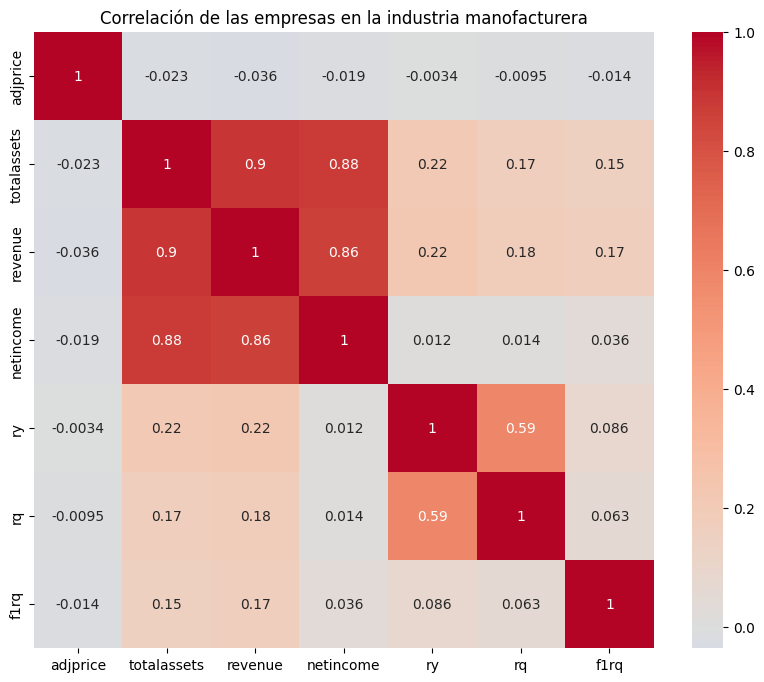

In [42]:
correlation_matrix = df.corr()

# Set up the heatmap figure
plt.figure(figsize = (10, 8))

# Create heatmap using seaborn
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", center = 0)

# Show the plot
plt.title("Correlación de las empresas en la industria manofacturera")
plt.show()

De acuerdo a la matriz de correlación lineal, que nos permite saber que tanta influencia tiene una variable sobre el comportamiento de otra podemos decir lo siguiente respecto a los retornos.
*vamos a excluir la correlación qr-qy ya que no es información que podemos tener en un contexto real*
*   Retorno trimestral (rq)
No muestra ninguna correlación mayor a 0.1 con ninguna de las variables esto quiere decir que los activos totales, las ganancias o el ingreso no tienen mucha influencia en el comportamiento del retorno trimestral ni anual
Las variables con mayor correlación son total assets y revenue en el caso de ambos retornos con una correlación apenas del 0.012 y 0.014 respectivamente.


Selecciona 2-3 variables con la mayor correlación lineal. Con el retorno trimestral.


Tenemos que las variables con mayos correlación al retorno trimestral son: El retorno anual, activos totales y ganancias.

In [53]:
df=data.copy()
df=df[(df['fiscalmonth']==12) & (df['industria']=="Industrias manufactureras")]
df['rq']= np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))
df['f1rq']= data['rq'].shift(-1)
df=df[["revenue","totalassets","rq","f1rq"]]



In [54]:
df.loc[df["revenue"] < -851.92, "revenue"] = -851.92
print(df.sort_values(by="revenue", ascending=True)["revenue"].head(10))


199274   -851.92
515791   -851.92
373637   -851.92
381492   -851.92
477131   -418.00
506202   -227.30
370985    -68.00
30286       0.00
30290       0.00
30294       0.00
Name: revenue, dtype: float64


In [55]:
print(df.sort_values(by="revenue", ascending=False)["revenue"].head(20))

525916   467,029,000.00
525904   459,579,000.00
525920   453,123,000.00
525924   420,836,000.00
525960   413,680,000.00
1135     394,328,000.00
525928   394,105,000.00
525900   390,328,000.00
525912   370,125,000.00
1131     365,817,000.00
525896   365,467,000.00
525892   358,955,000.00
525908   301,500,000.00
525888   291,252,000.00
525944   290,212,000.00
525956   276,692,000.00
1127     274,515,000.00
1119     265,595,000.00
127565   264,958,000.00
1123     260,174,000.00
Name: revenue, dtype: float64


¨Podemos ver que los valores extremos estan traatados


In [56]:
print(df.sort_values(by="totalassets", ascending=True)["totalassets"].head(10))


55176    0.00
523561   0.07
360289   0.07
43835    0.15
469701   0.16
360297   0.46
284412   0.58
422683   1.00
75780    2.19
360293   2.41
Name: totalassets, dtype: float64


In [57]:
print(df.sort_values(by="totalassets", ascending=False)["totalassets"].head(20))

197960   797,769,000.00
197956   795,337,000.00
197964   781,818,000.00
197968   751,216,000.00
197944   750,507,000.00
197972   717,242,000.00
197952   697,239,000.00
197976   685,328,000.00
197948   673,342,000.00
197980   656,560,000.00
197984   648,349,000.00
197940   647,483,000.00
197936   575,244,000.00
197932   495,023,000.00
197988   492,692,000.00
203834   479,603,000.00
203838   476,078,000.00
203830   448,507,000.00
197928   437,006,000.00
197996   377,945,000.00
Name: totalassets, dtype: float64


Aqui tampoco hay valores extremos

In [58]:
df=df.dropna()
df.isna().sum()

revenue        0
totalassets    0
rq             0
f1rq           0
dtype: int64

EN este caso hacemos el dronpna ya que de 22,000 variables tenemos 1000 con la variables que queremos predecir nula. En este caso es el retono del siguiente trimestre

In [59]:
import statsmodels.api as sm
X = df[["revenue", "totalassets"]]

# Add a constant term (intercept) to the features
X = sm.add_constant(X)

# Define your target variable (dependent variable)
y = df["rq"]

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the model summary
model_summary = model.summary()

# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                     rq   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.47
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           9.68e-09
Time:                        16:13:28   Log-Likelihood:                -6098.9
No. Observations:               21674   AIC:                         1.220e+04
Df Residuals:                   21671   BIC:                         1.223e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0133      0.002     -5.907      

In [60]:
X = df[["revenue", "totalassets"]]

# Add a constant term (intercept) to the features
X = sm.add_constant(X)

# Define your target variable (dependent variable)
y = df["rq"]

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the model summary
model_summary = model.summary()

# Print the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                     rq   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.47
Date:                Thu, 07 Sep 2023   Prob (F-statistic):           9.68e-09
Time:                        16:13:32   Log-Likelihood:                -6098.9
No. Observations:               21674   AIC:                         1.220e+04
Df Residuals:                   21671   BIC:                         1.223e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0133      0.002     -5.907      

Encontramos que los coeficientes de revenue y total assets son cercanos a cero. Lo que significa que hay poca relación entre como se mueven los retornos con base a las ganancias o activos totales.
A pesar de que revenue tiene un t value mayor que 2 y es estadisticamente significativo, tambien vemos que es cercano a 0. Así que, aunque se significativo sus valores se mantienen cercanos a 0, lo que significa que no guarda correlación con el la predicción del retorno trimestral.

En este caso el modelo nuestro modelo busca predecir el retorno trimestral de una empresa manofacturera de EU usando a partir de los activos netos y las ganancias. Los resultados son muy malos.
Nuestro modelo tiene un coeficiente de correlación R^2 cercano al 0. Esto nos indica que las predicciones tienen mucha varianza con los resultados esperados.


Este resultado era predecible ya que nuestras variables no eran significativas de acuerdo a nuestros coeficientes de correlación.

In [ ]:
"""model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")"""